In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import probplot
from scipy.stats import norm
from IPython.display import display

pd.set_option('display.max_columns', 100)

In [2]:
train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv', index_col = 0)

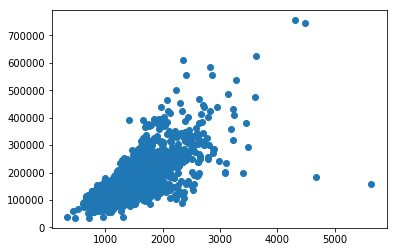

In [3]:
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.show()

In [4]:
# #Deleting outliers
# train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# #Check the graphic again
# fig, ax = plt.subplots()
# ax.scatter(train['GrLivArea'], train['SalePrice'])
# plt.ylabel('SalePrice', fontsize=13)
# plt.xlabel('GrLivArea', fontsize=13)
# plt.show()

In [5]:
mtrain_shape = train.shape[0]
mtest_shape = test.shape[0]

mtrain = train.iloc[:,:-1]
mtest = test.iloc[:,:-1]

ytrain = train['SalePrice'].values

all_data = pd.concat([mtrain, mtest],axis = 0)

In [6]:
all_data.shape

(2919, 79)

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

#### Check for duplicates

In [8]:
idunique = len(set(all_data.index))

idtotal = len(all_data.index)

duplicate = idtotal - idunique

#### Convert some categorical variables into string type.. originally present in int

In [9]:
all_data['MSSubClass'].astype('category')
all_data['BedroomAbvGr'].astype('category')
all_data = all_data.replace({'MoSold':{1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
                                       5 : 'May', 6: 'June', 7: 'Jul', 8: 'Aug',
                                        9 : 'Sep', 10 : "Oct", 11 : "Nov", 12 : 'Dec'}
                            })

(-0.5, 7.5, 0, 800000)

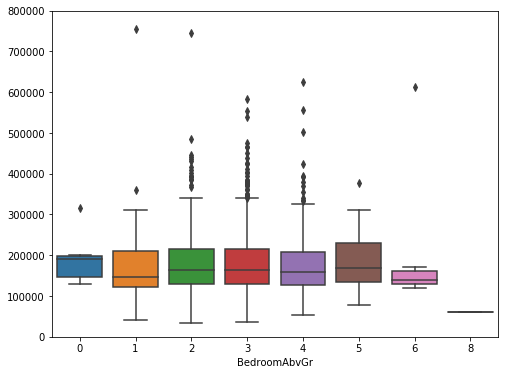

In [10]:
fig, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = all_data['BedroomAbvGr'], y = ytrain)
fig.axis(ymin=0, ymax=800000)

This Shows that BedroomAbvGr variable having values 2, 3, 4 have high impact on slaes price and having 6 and 8 prices have low price. 

#### Separate categorical and numerical features

In [11]:
categorical = all_data.select_dtypes(include= ['object','category']).columns
numerical = all_data.select_dtypes(exclude = ['object','category']).columns

In [12]:
print('Categorical features: ' + str(len(categorical)))
print('Numerical features: ' + str(len(numerical)))

Categorical features: 44
Numerical features: 35


#### Missing value treatment

In [13]:
all_data.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [14]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# BedroomAbvGr : NA most likely means 0
all_data.loc[:, "BedroomAbvGr"] = all_data.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
all_data.loc[:, "BsmtQual"] = all_data.loc[:, "BsmtQual"].fillna("No")
all_data.loc[:, "BsmtCond"] = all_data.loc[:, "BsmtCond"].fillna("No")
all_data.loc[:, "BsmtExposure"] = all_data.loc[:, "BsmtExposure"].fillna("No")
all_data.loc[:, "BsmtFinType1"] = all_data.loc[:, "BsmtFinType1"].fillna("No")
all_data.loc[:, "BsmtFinType2"] = all_data.loc[:, "BsmtFinType2"].fillna("No")
all_data.loc[:, "BsmtFullBath"] = all_data.loc[:, "BsmtFullBath"].fillna(0)
all_data.loc[:, "BsmtHalfBath"] = all_data.loc[:, "BsmtHalfBath"].fillna(0)
all_data.loc[:, "BsmtUnfSF"] = all_data.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
all_data.loc[:, "CentralAir"] = all_data.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
all_data.loc[:, "Condition1"] = all_data.loc[:, "Condition1"].fillna("Norm")
all_data.loc[:, "Condition2"] = all_data.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
all_data.loc[:, "EnclosedPorch"] = all_data.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
all_data.loc[:, "ExterCond"] = all_data.loc[:, "ExterCond"].fillna("TA")
all_data.loc[:, "ExterQual"] = all_data.loc[:, "ExterQual"].fillna("TA")
# FireplaceQu : data description says NA means "no fireplace"
all_data.loc[:, "FireplaceQu"] = all_data.loc[:, "FireplaceQu"].fillna("No")
all_data.loc[:, "Fireplaces"] = all_data.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
all_data.loc[:, "Functional"] = all_data.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
all_data.loc[:, "GarageType"] = all_data.loc[:, "GarageType"].fillna("No")
all_data.loc[:, "GarageFinish"] = all_data.loc[:, "GarageFinish"].fillna("No")
all_data.loc[:, "GarageQual"] = all_data.loc[:, "GarageQual"].fillna("No")
all_data.loc[:, "GarageCond"] = all_data.loc[:, "GarageCond"].fillna("No")
all_data.loc[:, "GarageArea"] = all_data.loc[:, "GarageArea"].fillna(0)
all_data.loc[:, "GarageCars"] = all_data.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
all_data.loc[:, "HalfBath"] = all_data.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
all_data.loc[:, "HeatingQC"] = all_data.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
all_data.loc[:, "KitchenAbvGr"] = all_data.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
all_data.loc[:, "KitchenQual"] = all_data.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
all_data.loc[:, "LotFrontage"] = all_data.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
all_data.loc[:, "LotShape"] = all_data.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
all_data.loc[:, "MasVnrType"] = all_data.loc[:, "MasVnrType"].fillna("None")
all_data.loc[:, "MasVnrArea"] = all_data.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
all_data.loc[:, "MiscVal"] = all_data.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
all_data.loc[:, "OpenPorchSF"] = all_data.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
all_data.loc[:, "PavedDrive"] = all_data.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
all_data.loc[:, "PoolArea"] = all_data.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
all_data.loc[:, "SaleCondition"] = all_data.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
all_data.loc[:, "ScreenPorch"] = all_data.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
all_data.loc[:, "TotRmsAbvGrd"] = all_data.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
all_data.loc[:, "Utilities"] = all_data.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
all_data.loc[:, "WoodDeckSF"] = all_data.loc[:, "WoodDeckSF"].fillna(0)

# filling null values with median/mode/bckfill
all_data.loc[:, 'GarageYrBlt'] = all_data.loc[:, 'GarageYrBlt'].fillna(method = 'backfill')
all_data.loc[:, 'MSZoning'] = all_data.loc[:, 'MSZoning'].fillna('RL')
all_data.loc[:, 'BsmtFinSF1'] = all_data.loc[:, 'BsmtFinSF1'].fillna(0.0)
all_data.loc[:, 'BsmtFinSF2'] = all_data.loc[:, 'BsmtFinSF2'].fillna(0.0)
all_data.loc[:, 'TotalBsmtSF'] = all_data.loc[:, 'TotalBsmtSF'].fillna(all_data['TotalBsmtSF'].median())
all_data.loc[:, 'SaleType'] = all_data.loc[:, 'SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data.loc[:, 'Exterior1st'] = all_data.loc[:, 'Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data.loc[:, 'Exterior2nd'] = all_data.loc[:, 'Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data.loc[:, 'Electrical'] = all_data.loc[:, 'Electrical'].fillna(all_data['Electrical'].mode()[0])


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

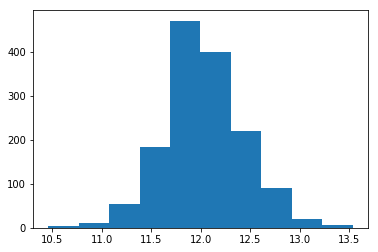

In [15]:
ytrain = np.log(ytrain)

plt.hist(ytrain)

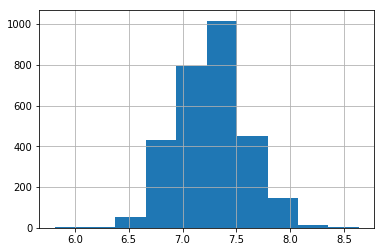

In [16]:
all_data['GrLivArea']  = np.log(all_data['GrLivArea'])

all_data['GrLivArea'].hist()

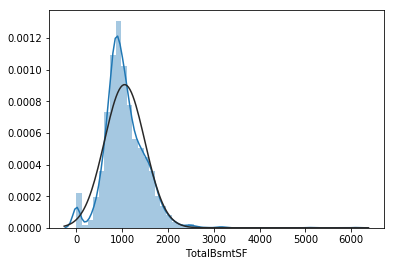

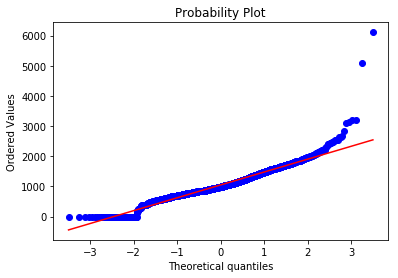

In [17]:
sns.distplot(all_data['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = probplot(all_data['TotalBsmtSF'], plot = plt)

A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

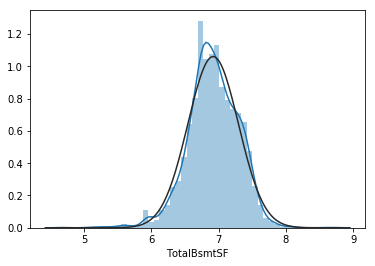

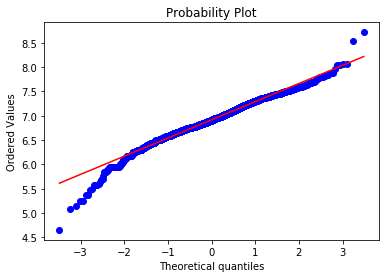

In [18]:
all_data['HasBmt'] = pd.Series(len(all_data['TotalBsmtSF']), index = all_data.index)

all_data['HasBmt'] = 0

all_data['HasBmt'] = np.where(all_data['TotalBsmtSF']==0.0, 0, 1)

#Transform 
all_data.loc[all_data['HasBmt']==1,'TotalBsmtSF'] = np.log(all_data['TotalBsmtSF'])


#histogram and normal probability plot
sns.distplot(all_data[all_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = probplot(all_data[all_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

# remove HasBmt because it is highly correlated with TotalBsmtSF
all_data = all_data.drop('HasBmt', axis = 1)

In [19]:
all_data = pd.get_dummies(all_data, drop_first = True)

### Modeling

In [20]:
y = ytrain

X = all_data.iloc[:mtrain_shape,:]
test_data = all_data.iloc[mtrain_shape:, :]

In [21]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.3)

print('X_train shape is', X_train.shape)
print('y_train shape is', y_train.shape)
print('X_test shape is', X_test.shape)
print('y_test shape is', y_test.shape)


X_train shape is (1022, 255)
y_train shape is (1022,)
X_test shape is (438, 255)
y_test shape is (438,)


In [23]:
#### Makimg a scorer from metric

scorer = make_scorer(mean_squared_error, greater_is_better= False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

**Linear Regression without regularization**

In [24]:
# lr = LinearRegression()
# lr.fit(X_train, y_train)

# # Look at predictions on training and validation set

# print('RMSE on training data: ', rmse_cv_train(lr).mean())
# print("RMSE on Test set :", rmse_cv_test(lr).mean())

# y_train_pred = lr.predict(X_train)
# y_test_pred = lr.predict(X_test)

# ### Plot Residual
# plt.scatter(x = y_train_pred, y = (y_train_pred - y_train), c = 'blue', marker = 's', label = 'Training Data')
# plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
# plt.title("Linear regression")
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals")
# plt.legend(loc = "upper left")
# plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
# plt.show()

A common use of the residuals plot is to analyze the variance of the error of the regressor. If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate. In the case above, we see a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well. We can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model.


**Interpretation of various kind of Residual Plots**
http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#nonlinear-header

In [25]:
# # Plot predictions
# plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
# plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
# plt.title("Linear regression")
# plt.xlabel("Predicted values")
# plt.ylabel("Real values")
# plt.legend(loc = "upper left")
# plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
# plt.show()

So residual plot verifies that model is working fine, there is less variance in error and Real vs Predicted plot verifies that actual values and predicted values are strongly correlated. 

 **Linear Regression with Ridge regularization (L2 penalty)**

In [26]:
# ridge = RidgeCV(alphas= [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
# ridge.fit(X_train, y_train)

# alpha = ridge.alpha_
# print('Best alpha is : ', alpha)

# ## try with more precision

# ridge = RidgeCV(alphas = [alpha * 0.06, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
#                           alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
#                           alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
#                             cv = 10)

# ridge.fit(X_train, y_train)

# alpha = ridge.alpha_
# print("Best alpha :", alpha)

# print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
# print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
# y_train_rdg = ridge.predict(X_train)
# y_test_rdg = ridge.predict(X_test)


# y_test_rdg = ridge.predict(X_test)

# # Plot residuals
# plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
# plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
# plt.title("Linear regression with Ridge regularization")
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals")
# plt.legend(loc = "upper left")
# plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
# plt.show()

# # Plot predictions
# plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
# plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
# plt.title("Linear regression with Ridge regularization")
# plt.xlabel("Predicted values")
# plt.ylabel("Real values")
# plt.legend(loc = "upper left")
# plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
# plt.show()

# # Plot important coefficients
# coefs = pd.Series(ridge.coef_, index = X_train.columns)
# print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
#       str(sum(coefs == 0)) + " features")
# imp_coefs = pd.concat([coefs.sort_values().head(10),
#                      coefs.sort_values().tail(10)])
# imp_coefs.plot(kind = "barh")
# plt.title("Coefficients in the Ridge Model")
# plt.show()

#### LASSO

In [27]:
# # 3* Lasso
# lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
#                           0.3, 0.6, 1], 
#                 max_iter = 50000, cv = 10)
# lasso.fit(X_train, y_train)
# alpha = lasso.alpha_
# print("Best alpha :", alpha)

# print("Try again for more precision with alphas centered around " + str(alpha))
# lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
#                           alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
#                           alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
#                           alpha * 1.4], 
#                 max_iter = 50000, cv = 10)
# lasso.fit(X_train, y_train)
# alpha = lasso.alpha_
# print("Best alpha :", alpha)

# print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
# print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
# y_train_las = lasso.predict(X_train)
# y_test_las = lasso.predict(X_test)

# # Plot residuals
# plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
# plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
# plt.title("Linear regression with Lasso regularization")
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals")
# plt.legend(loc = "upper left")
# plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
# plt.show()

# # Plot predictions
# plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
# plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
# plt.title("Linear regression with Lasso regularization")
# plt.xlabel("Predicted values")
# plt.ylabel("Real values")
# plt.legend(loc = "upper left")
# plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
# plt.show()

# # Plot important coefficients
# coefs = pd.Series(lasso.coef_, index = X_train.columns)
# print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
#       str(sum(coefs == 0)) + " features")
# imp_coefs = pd.concat([coefs.sort_values().head(10),
#                      coefs.sort_values().tail(10)])
# imp_coefs.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")
# plt.show()


Best l1_ratio : 0.3
Best alpha : 0.0006
Try again for more precision with l1_ratio centered around 0.3
Best l1_ratio : 0.3
Best alpha : 0.0006
Now try again for more precision on alpha, with l1_ratio fixed at 0.3 and alpha centered around 0.0006
Best l1_ratio : 0.3
Best alpha : 0.0006
ElasticNet RMSE on Training set : 0.14300096185981676
ElasticNet RMSE on Test set : 0.11963289453351737


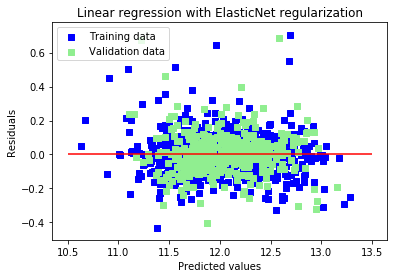

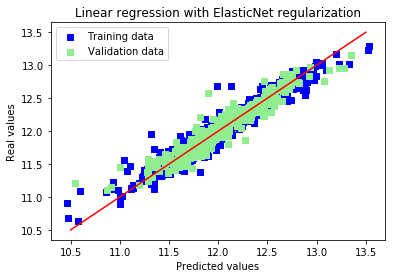

ElasticNet picked 168 features and eliminated the other 87 features


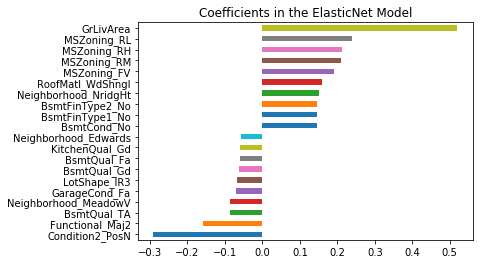

In [28]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

In [30]:
test_pred = elasticNet.predict(test_data)
test_pred = np.expm1(test_pred) 

submission = pd.read_csv('sample_submission.csv', index_col = 0)

submission['SalePrice'] = test_pred

submission.to_csv('ElasticNet.csv')